### Correlation


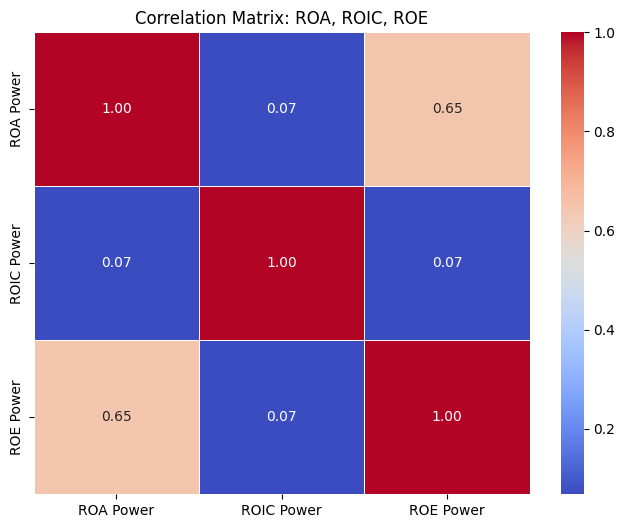

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data (make sure your data is in the right format)

ROA = pd.read_csv('sp500_roa_power.csv')
ROE = pd.read_csv('sp500_roe_power.csv')
ROIC = pd.read_csv('sp500_roic_power.csv')
df = ROA.merge(ROE, on=['Ticker']).merge(ROIC, on=['Ticker'])
df
# Calculate correlation matrix
correlation = df[['ROA Power', 'ROIC Power', 'ROE Power']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: ROA, ROIC, ROE')
plt.show()


# Plotting boxplot for ROA, ROIC, ROE distribution across firms



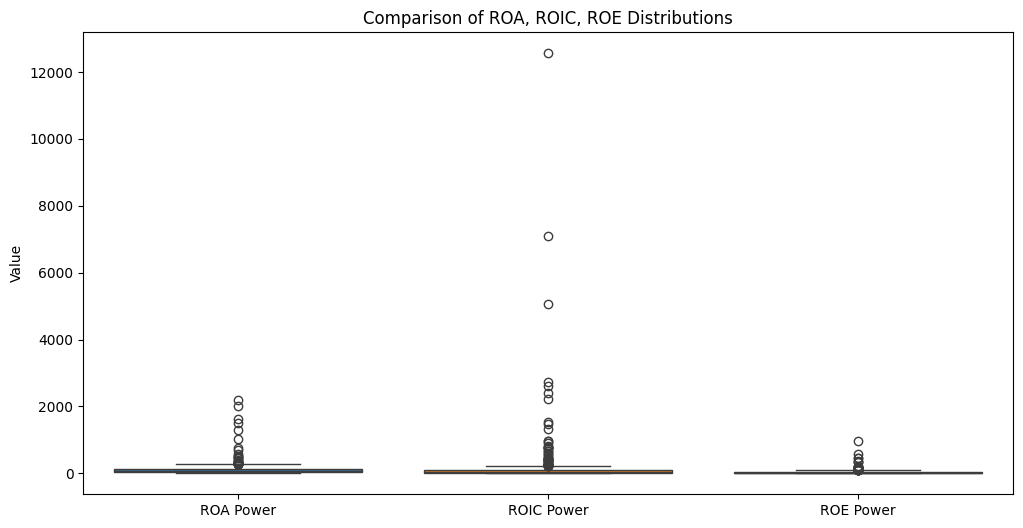

In [2]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['ROA Power', 'ROIC Power', 'ROE Power']])
plt.title('Comparison of ROA, ROIC, ROE Distributions')
plt.ylabel('Value')
plt.show()

### TOp and bottom firms


/tmp/ipykernel_22174/4049973996.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROA Power', y='Full Name', data=pd.concat([top_roa, bottom_roa]), palette='viridis')


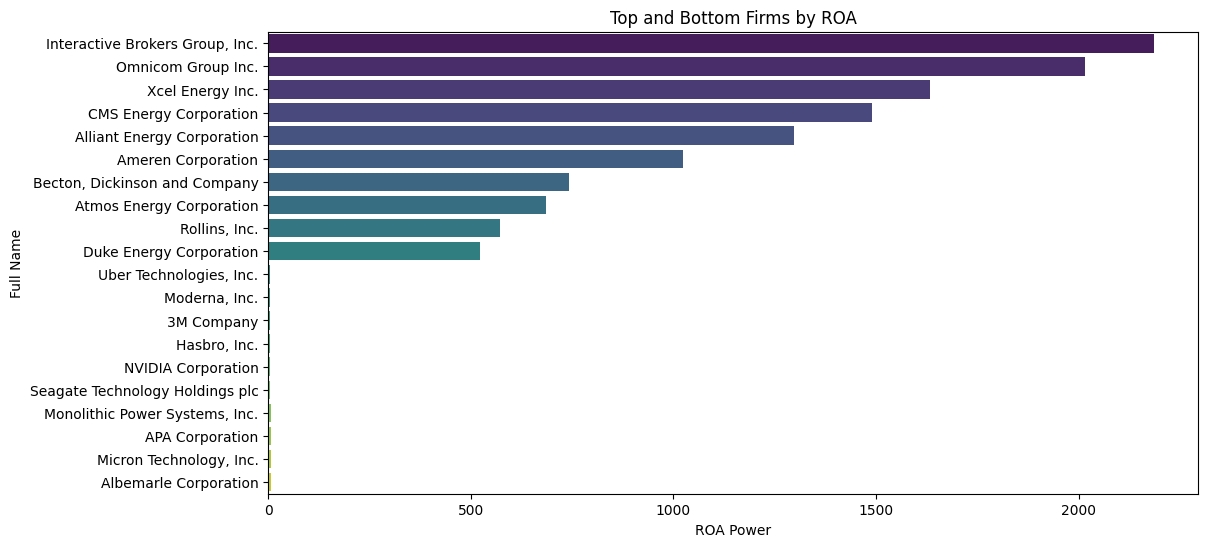

/tmp/ipykernel_22174/4049973996.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROA Power', y='Full Name', data=pd.concat([top_roa, bottom_roa]), palette='viridis')


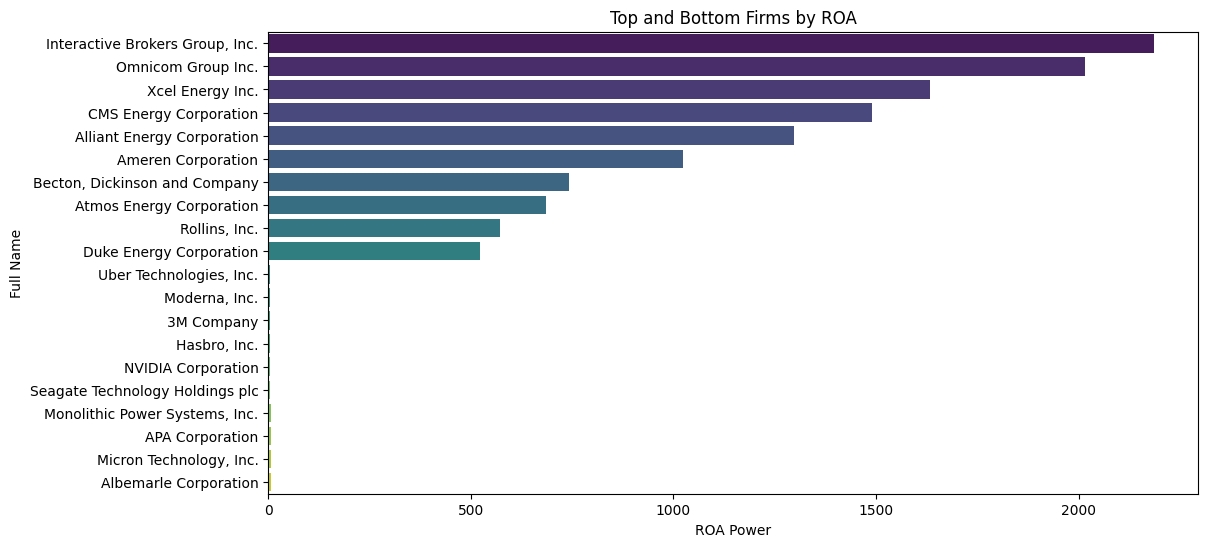

/tmp/ipykernel_22174/4049973996.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROE Power', y='Full Name', data=pd.concat([top_roe, bottom_roe]), palette='magma')


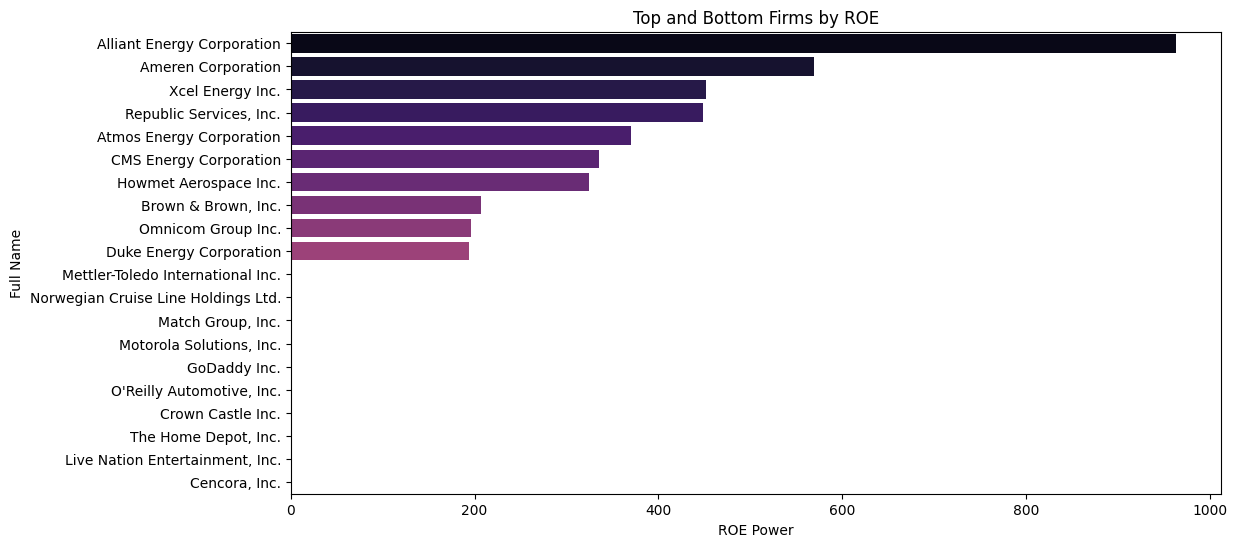

/tmp/ipykernel_22174/4049973996.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROIC Power', y='Full Name', data=pd.concat([top_roic, bottom_roic]), palette='plasma')


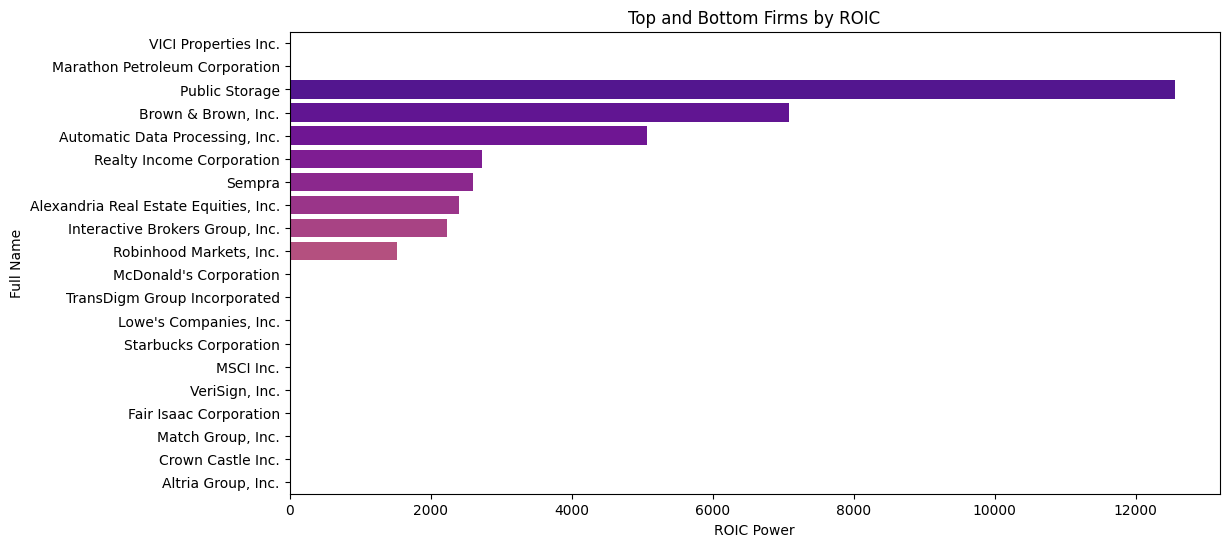

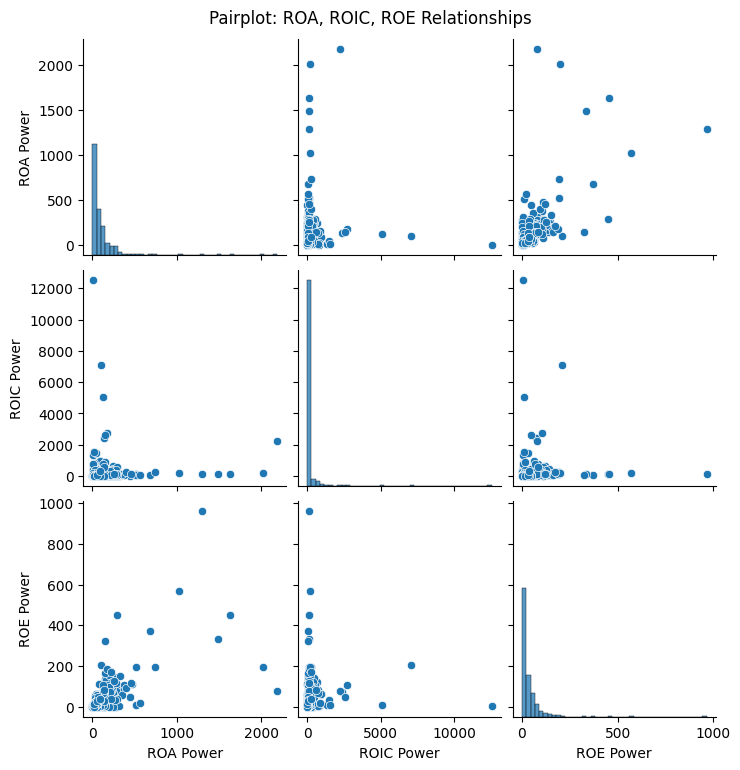

In [4]:
# Pairplot to show relationships between ROA, ROIC, and ROE
sns.pairplot(df[['ROA Power', 'ROIC Power', 'ROE Power']])
plt.suptitle('Pairplot: ROA, ROIC, ROE Relationships', y=1.02)
plt.show()


### top 10 across all methods

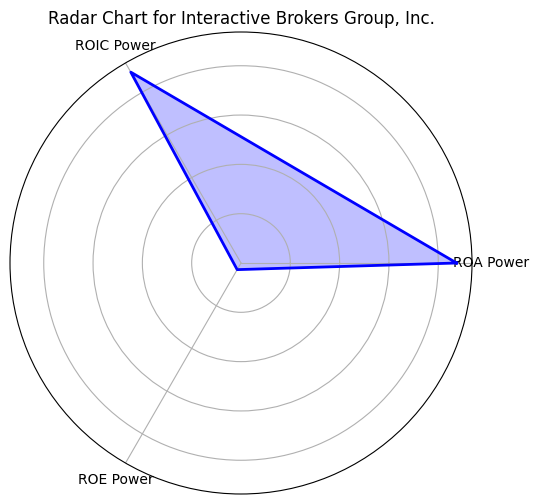

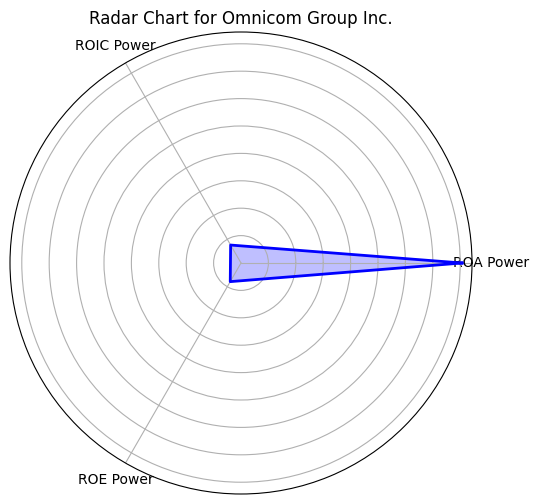

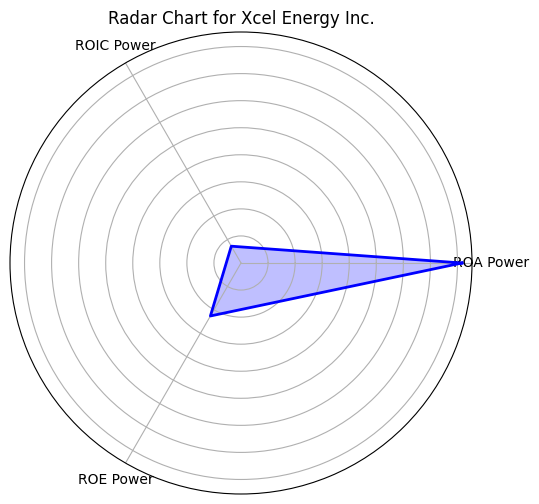

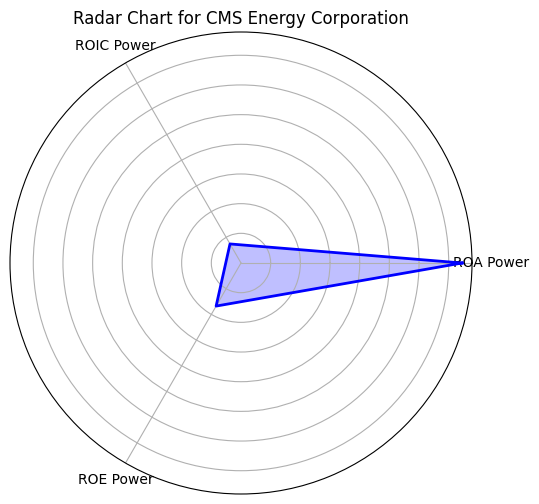

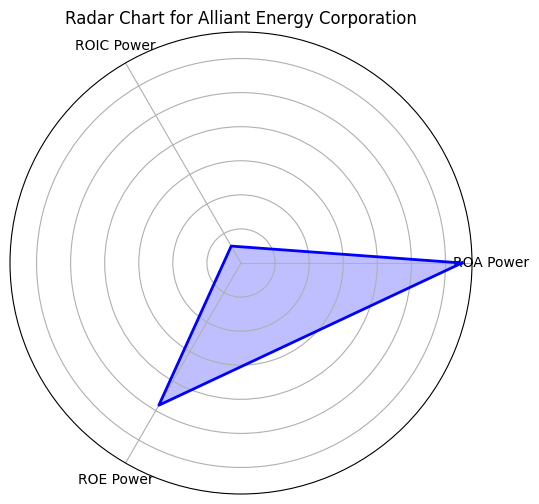

In [5]:
import numpy as np
from math import pi

# Top firms for comparison
top_firms = df.nlargest(5, 'ROA Power')[['Full Name', 'ROA Power', 'ROIC Power', 'ROE Power']]

# Radar chart plotting function
def radar_chart(data, labels):
    # Number of metrics
    num_vars = len(labels)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the loop
    values = data.tolist()
    values += values[:1]
    angles += angles[:1]

    # Plotting the radar chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

# Plot radar charts for top 5 firms
for _, row in top_firms.iterrows():
    radar_chart(row[['ROA Power', 'ROIC Power', 'ROE Power']], ['ROA Power', 'ROIC Power', 'ROE Power'])
    plt.title(f'Radar Chart for {row["Full Name"]}')
    plt.show()


In [6]:
! pip install plotly 
import plotly.graph_objects as go

def interactive_table(metric):
    top = df.nlargest(10, metric)[['Full Name', metric]]
    bottom = df.nsmallest(10, metric)[['Full Name', metric]]
    table_data = pd.concat([
        top.assign(Segment='Top 10'),
        bottom.assign(Segment='Bottom 10')
    ])

    fig = go.Figure(data=[go.Table(
        header=dict(values=['Segment', 'Full Name', metric],
                    fill_color='paleturquoise', align='left'),
        cells=dict(values=[table_data[k] for k in ['Segment','Full Name',metric]],
                   fill_color=[['lightgreen' if s=='Top 10' else 'salmon'
                                for s in table_data['Segment']]],
                   align='left'))
    ])
    fig.update_layout(title=f"Top and Bottom 10 Firms by {metric}",
                      height=500)
    fig.show()

interactive_table('ROA Power')
interactive_table('ROIC Power')
interactive_table('ROE Power')



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


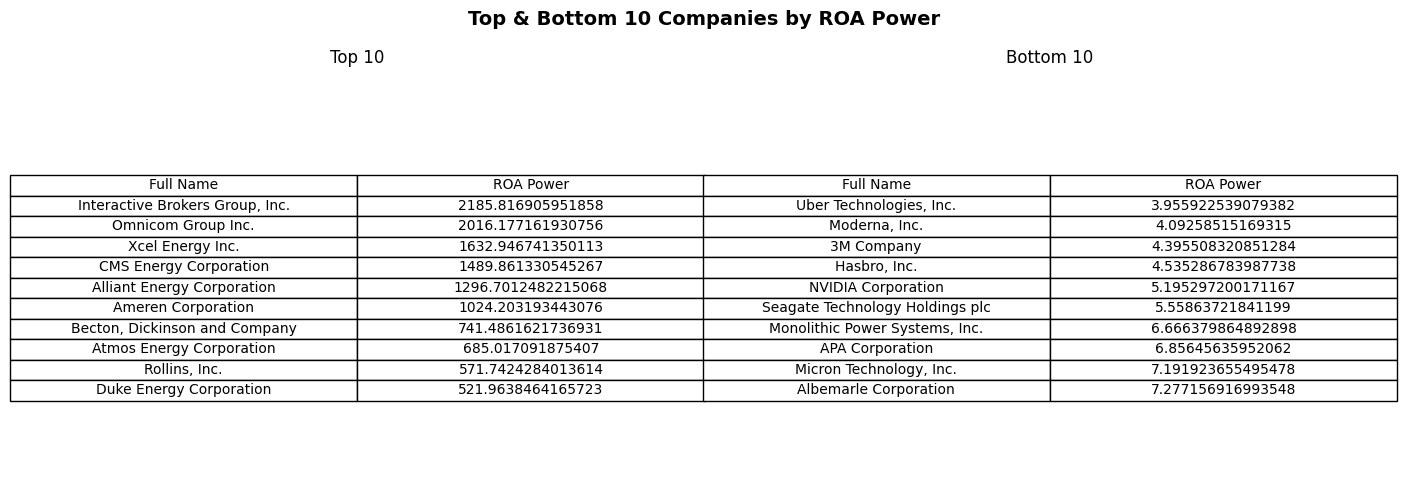

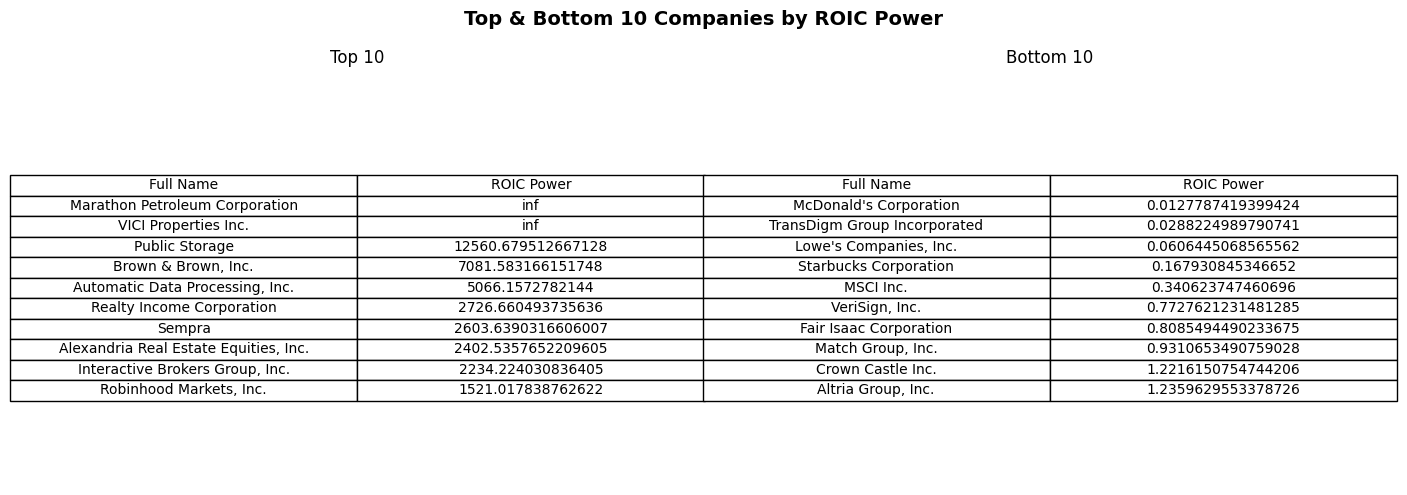

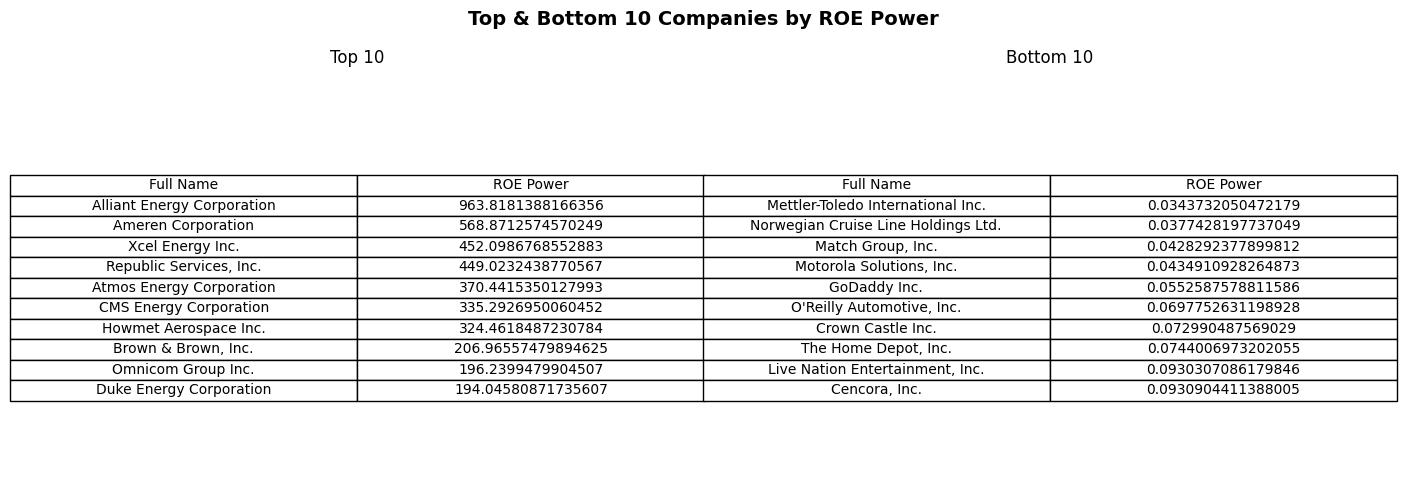

In [9]:
import matplotlib.pyplot as plt

def plot_table(metric):
    top = df.nlargest(10, metric)[['Full Name', metric]]
    bottom = df.nsmallest(10, metric)[['Full Name', metric]]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"Top & Bottom 10 Companies by {metric}", fontsize=14, weight='bold')

    for ax, data, title in zip(axes, [top, bottom], ['Top 10', 'Bottom 10']):
        ax.axis('off')
        table = ax.table(cellText=data.values, colLabels=data.columns,
                         cellLoc='center', loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1.2, 1.2)
        ax.set_title(title, fontsize=12, pad=20)

    plt.tight_layout()
    plt.show()

# Create visuals
plot_table('ROA Power')
plot_table('ROIC Power')
plot_table('ROE Power')
